### Importing the dependencies

In [25]:
#importing the dependencies

import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importing the ZIP file from the address & unzipping it

In [27]:
!pip install gdown
!gdown --id 1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb --output data.zip

Downloading...
From: https://drive.google.com/uc?id=1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb
To: /content/data.zip
354MB [00:01, 277MB/s]


In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/data.zip", 'r')    #Path of the zip file
zip_ref.extractall("/content/")                        #To extract it directly in /content
zip_ref.close()

### Validating the files

##### Getting the folder names

In [ ]:
data_dir = "/content/cell_images"
os.listdir(data_dir)

['train', 'test']

In [ ]:
train_path = "/content/cell_images/train"
test_path = "/content/cell_images/test"

print(os.listdir(train_path))
print(os.listdir(test_path))

['parasitized', 'uninfected']
['parasitized', 'uninfected']


##### Getting the list of images in the folders

In [ ]:
import glob

In [ ]:
#all the images are in .png format
train_para = glob.glob("/content/cell_images/train/parasitized/*.png")
train_unin = glob.glob("/content/cell_images/train/uninfected/*.png")
test_para = glob.glob("/content/cell_images/test/parasitized/*.png")
test_unin = glob.glob("/content/cell_images/test/uninfected/*.png")

In [ ]:
print("Count of images in train_para:", len(train_para))
print("Count of images in train_unin:", len(train_unin))
print("Count of images in test_para:", len(test_para))
print("Count of images in test_unin:", len(test_unin))

Count of images in train_para: 12479
Count of images in train_unin: 12479
Count of images in test_para: 1300
Count of images in test_unin: 1300


##### Visualizing the images

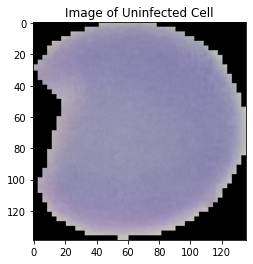

In [ ]:
from matplotlib.image import imread

random_index = 11
#visulaizing an uninfected cell
data_u = imread(train_unin[11])     #output of random index is numpy array
plt.title("Image of Uninfected Cell")
plt.imshow(data_u)

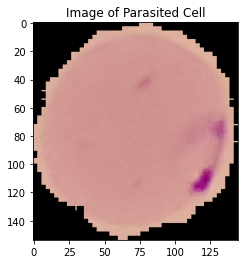

In [ ]:
random_index = 11
#visulaizing an infected cell
data_i = imread(train_para[11])     #output of random index is numpy array
plt.title("Image of Parasited Cell")
plt.imshow(data_i)
plt.show()

##### Analyzing the dimensions of the images 

In [ ]:
#train_para : list of all images in training parasited folder
#train_unin : list of all images in training uninfected folder
#test_para : list of all images in test parasited folder
#test_unin : list of all images in test uninfected folder

def get_all_dimensions(folder_list):    
  '''return two lists containing data on the width and height of the images in the folder'''
    
  dim1 = []
  dim2 = []

  for image in folder_list:
    image_data = imread(image)

    d1, d2, color_channel = image_data.shape
    dim1.append(d1)
    dim2.append(d2)

  return (dim1, dim2)


In [ ]:
#Analyzing only the train_para dataset

train_para_width_dim,train_para_height_dim = get_all_dimensions(train_para)

In [ ]:
print("length of train_para_width_dim is: ", len(train_para_width_dim))
print("length of train_para_height_dim is: ", len(train_para_height_dim))

length of train_para_width_dim is:  12479
length of train_para_height_dim is:  12479


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


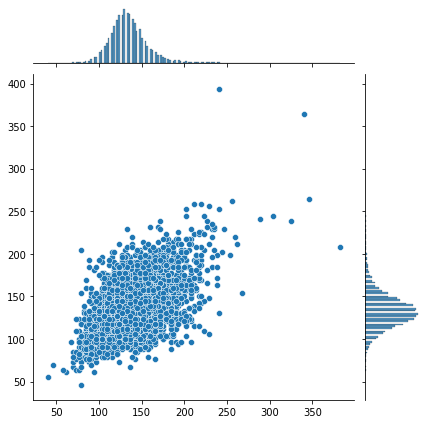

In [ ]:
import seaborn as sns
sns.jointplot(train_para_width_dim,train_para_height_dim)
plt.xlabel("Width Distribution")
plt.xlabel("Height Distribution")
plt.show()

In [ ]:
#Note: All the images have different shape and thus need to be resized to some uniform shape

In [ ]:
avg_width = np.mean(np.array(train_para_width_dim))
avg_height = np.mean(np.array(train_para_height_dim))

print(f"The average image dimension is {np.round(avg_width)} by {np.round(avg_height)}")


The average image dimension is 134.0 by 134.0


In [ ]:
#We will process each image to size of (130,130,3)

### Data Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [ ]:
#checking some random transformation on the imagez

image_data_gen = ImageDataGenerator(
                  rotation_range = 20,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  fill_mode= "nearest")

#rescaling not needed as all datapoints are already normalized

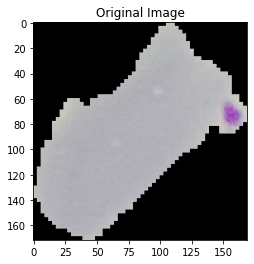

In [ ]:
#taking a random image from train_para
random_index = 101

#original image
img_arr = imread(train_para[random_index])          
plt.imshow(img_arr)
plt.title("Original Image")
plt.show()

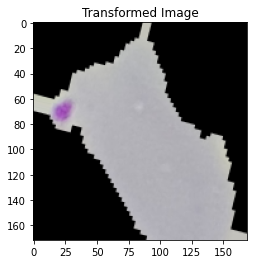

In [ ]:
#After transformations
plt.imshow(image_data_gen.random_transform(img_arr))    #takes numpy array as input
plt.title("Transformed Image")
plt.show()

In [ ]:
image_data_gen.flow_from_directory("/content/cell_images/train")

Found 24958 images belonging to 2 classes.


In [ ]:
image_data_gen.flow_from_directory("/content/cell_images/test")

Found 2600 images belonging to 2 classes.


In [ ]:
image_shape = (130,130,3)

In [ ]:
train_datagen = ImageDataGenerator(
                  rotation_range = 20,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  fill_mode= "nearest")

test_datagen = ImageDataGenerator(
                  rotation_range = 20,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  fill_mode= "nearest")

train_generator = train_datagen.flow_from_directory(
                  '/content/cell_images/train',
                  color_mode = "rgb",
                  target_size= image_shape[:2],            #target size is concerned only with width and height
                  batch_size=32,
                  class_mode='binary')
 
 
test_generator = test_datagen.flow_from_directory(
                  '/content/cell_images/test',
                  color_mode = "rgb",
                  target_size = image_shape[:2],            #target size is concerned only with width and height
                  batch_size=32,
                  class_mode='binary',
                  shuffle = False)                #make shuffle False while testing to avoid error

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
train_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

### Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

def my_model():
  model = Sequential()
  
  model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = "relu" ))
  model.add(MaxPool2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = "relu" ))
  model.add(MaxPool2D(pool_size = (2,2)))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = "relu" ))
  model.add(MaxPool2D(pool_size = (2,2)))

  model.add(Flatten())
  model.add(Dense(units = 128, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = "sigmoid"))           #since its binary classifiaction

  model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  return model


In [ ]:
model = my_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 10)

In [ ]:
model_history = model.fit_generator(train_generator,
                                    epochs = 1000,
                                    validation_data = test_generator,
                                    callbacks = [early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
780/780 [==============================] - 135s 164ms/step - loss: 2.3836 - accuracy: 0.5552 - val_loss: 0.2900 - val_accuracy: 0.9185
Epoch 2/1000
780/780 [==============================] - 127s 162ms/step - loss: 0.2576 - accuracy: 0.9205 - val_loss: 0.2375 - val_accuracy: 0.9142
Epoch 3/1000
780/780 [==============================] - 127s 162ms/step - loss: 0.2269 - accuracy: 0.9284 - val_loss: 0.2181 - val_accuracy: 0.9246
Epoch 4/1000
780/780 [==============================] - 129s 166ms/step - loss: 0.2189 - accuracy: 0.9315 - val_loss: 0.1910 - val_accuracy: 0.9408
Epoch 5/1000
780/780 [==============================] - 129s 165ms/step - loss: 0.1915 - accuracy: 0.9409 - val_loss: 0.1714 - val_accuracy: 0.9458
Epoch 6/1000
780/780 [==============================] - 129s 165ms/step - loss: 0.1857 - accuracy: 0.9452 - val_loss: 0.1892 - val_accuracy: 0.9427
Epoch 7/1000
780/780 [==============================] - 129s 165ms/step - loss: 0.1753 - accuracy: 0.9460 - val_

In [33]:
model.metrics_names              #getting the metrics name

['loss', 'accuracy']

### Plotting the graphs

In [ ]:
history_df = pd.DataFrame(model_history.history)       

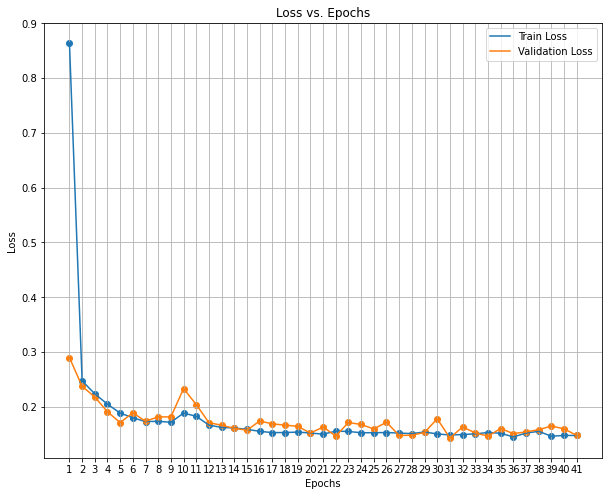

In [ ]:
l = len(history_df) + 1

#Plotting the loss

plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, l),history_df["loss"])
plt.scatter(np.arange(1, l),history_df["loss"])

plt.plot(np.arange(1, l),history_df["val_loss"])
plt.scatter(np.arange(1, l),history_df["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(1, l))
plt.title("Loss vs. Epochs")
plt.grid(True)
plt.legend(('Train Loss', 'Validation Loss'))
plt.show()



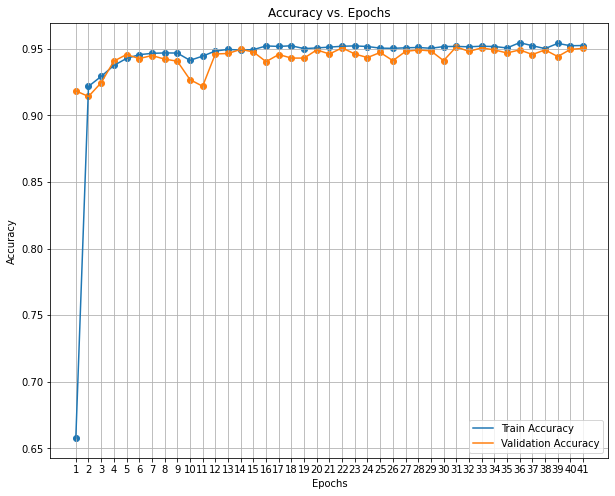

In [ ]:
#Plotting the accuracy


plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, l),history_df["accuracy"])
plt.scatter(np.arange(1, l),history_df["accuracy"])

plt.plot(np.arange(1, l),history_df["val_accuracy"])
plt.scatter(np.arange(1, l),history_df["val_accuracy"])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, l))
plt.title("Accuracy vs. Epochs")
plt.grid(True)
plt.legend(('Train Accuracy', 'Validation Accuracy'))
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/rbc_classification.h5")          #model saved in Gdrive for future uses

### Loading my saved model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model = load_model("/content/drive/MyDrive/rbc_classification.h5")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [32]:
model.metrics_names

['loss', 'accuracy']

In [35]:
val_loss, val_accuracy = model.evaluate_generator(test_generator)
print("The model's val_loss is ", val_loss)
print("The model's val_accuracy is ", val_accuracy)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The model's val_loss is  0.14528675377368927
The model's val_accuracy is  0.949999988079071


### Evaluating the model

In [37]:
#ACtual labels of the test set 

y_test_actual = test_generator.classes    #to get the corresponding actual labels from my generator 
print(y_test_actual)
print(len(y_test_actual))

#2600 images of 1300 each

[0 0 0 ... 1 1 1]
2600


In [42]:
#Predicted labels of the test_Set

y_test_pred = model.predict(test_generator)    #note the generator gives the probabilities
y_test_pred = y_test_pred.squeeze()

In [47]:
THRESHOLD_VALUE = 0.5
y_test_pred = y_test_pred > THRESHOLD_VALUE 
y_test_pred = y_test_pred.astype(int)
y_test_pred
print(len(y_test_pred))

2600


In [51]:
test_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [52]:
#### Note: Here Class 1/True implies "uninfected cell" and Class 0/Flase implies parasitized_cell

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test_actual, y_test_pred))

[[1228   72]
 [  50 1250]]


In [50]:
print(classification_report(y_test_actual, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.95      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



### Testing a single image

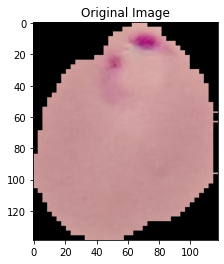

In [54]:
#taking a random image from test_para
random_index = 111

#original image
img_arr = imread(test_para[random_index])          
plt.imshow(img_arr)
plt.title("Original Image")
plt.show()

In [56]:
from tensorflow.keras.preprocessing import image

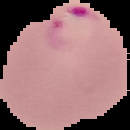

In [57]:
my_para_img = image.load_img(test_para[random_index], target_size = (130,130,3))   #need to rescale it to (130,130,3)
my_para_img      #its reading the image and need to be converted to array

In [60]:
my_para_img = image.img_to_array(my_para_img)
print(my_para_img.shape)

(130, 130, 3)


In [62]:
# Now we need to expand dimensions of the image along 0 axis

my_para_img = my_para_img.reshape(1,130,130,3)

#my_para_img = np.expand_dims(my_para_img, axis = 0)

print(my_para_img.shape)

(1, 130, 130, 3)


In [72]:
#Finally prediction
output = (model.predict(my_para_img) > THRESHOLD_VALUE).astype(int).item()

#model.predict(my_para_img) : Will give probability between 0 and 1
#model.predict(my_para_img) > THRESHOLD_VALUE : Will give True/ Flase
#(model.predict(my_para_img) > THRESHOLD_VALUE).astype(int): Will give 2nd order array
#(model.predict(my_para_img) > THRESHOLD_VALUE).astype(int).item() : Will give me class 0 or 1


In [74]:
my_dict = {0:"parasitized", 1:"uninfected"}
print("The predicted class is: ", my_dict[output] )

The predicted class is:  parasitized
